In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
y = df["target"]

In [ ]:
X = df.drop("target", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42
)

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [ ]:
print(
	f"Количество неправильно классифицированных 	точек из {X_test.shape[0]} : {(y_test != 	y_pred).sum()}"
)


Количество неправильно классифицированных 	точек из 61 : 8


In [ ]:
confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 5, 27]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8688524590163934

In [ ]:
precision_score(y_test, y_pred)

0.9

In [ ]:
f1_score(y_test, y_pred)

0.8709677419354839

In [ ]:
recall_score(y_test, y_pred)

0.84375

In [ ]:
y_probs = gnb.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
f"Площадь под ROC-кривой (AUC) для модели: {roc_auc:.4f}"

'Площадь под ROC-кривой (AUC) для модели: 0.8944'

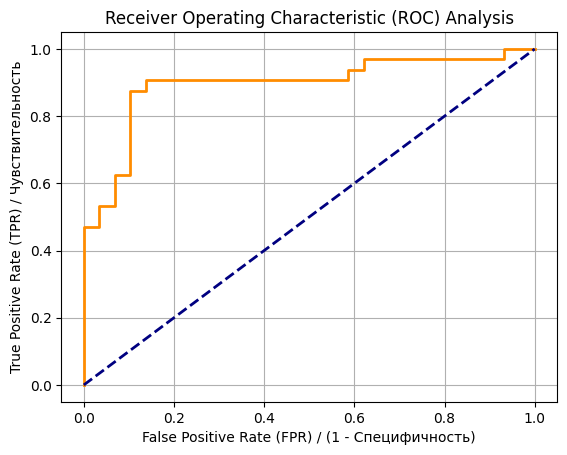

In [ ]:
import matplotlib.pyplot as plt

# построение ROC-кривой
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.4f})')

# построение линии случайного классификатора (диагональ)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
label='Случайный классификатор (AUC = 0.5)')

# настройка осей и заголовка
plt.xlabel('False Positive Rate (FPR) / (1 - Специфичность)')
plt.ylabel('True Positive Rate (TPR) / Чувствительность')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.grid(True)
plt.show()


In [ ]:
logreg = LogisticRegression(
	random_state=77, max_iter=1000
)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=77)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(
	f"Количество неправильно классифицированных 	точек из {X_test.shape[0]} : {(y_test != 	y_pred).sum()}"
)

Количество неправильно классифицированных 	точек из 61 : 8


In [ ]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 4, 28]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8688524590163934

In [ ]:
precision_score(y_test, y_pred)

0.875

In [ ]:
recall_score(y_test, y_pred)

0.875

In [ ]:
f1_score(y_test, y_pred)

0.875

In [ ]:
y_probs = logreg.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
f"Площадь под ROC-кривой (AUC) для модели: {roc_auc:.4f}"

'Площадь под ROC-кривой (AUC) для модели: 0.9267'

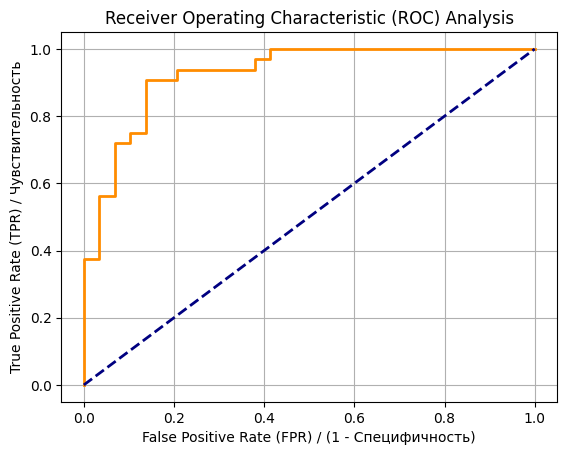

In [ ]:
import matplotlib.pyplot as plt

# построение ROC-кривой
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.4f})')

# построение линии случайного классификатора (диагональ)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
label='Случайный классификатор (AUC = 0.5)')

# настройка осей и заголовка
plt.xlabel('False Positive Rate (FPR) / (1 - Специфичность)')
plt.ylabel('True Positive Rate (TPR) / Чувствительность')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.grid(True)
plt.show()

In [ ]:
acc_series = []

In [ ]:
for k in range(1, 21):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	y_pred = knn.predict(X_test)
	accuracy = accuracy_score(y_test, y_pred)
	acc_series.append(accuracy)


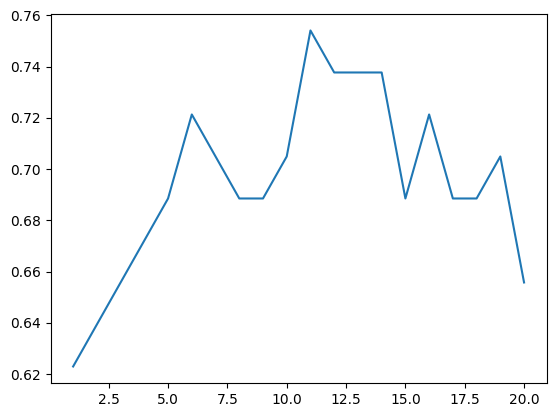

In [ ]:
plt.plot(range(1, 21), acc_series)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(
	f"Количество неправильно классифицированных 	точек из {X_test.shape[0]} : {(y_test != 	y_pred).sum()}"
)

Количество неправильно классифицированных 	точек из 61 : 15


In [ ]:
confusion_matrix(y_test, y_pred)

array([[20,  9],
       [ 6, 26]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7540983606557377

In [ ]:
precision_score(y_test, y_pred)

0.7428571428571429

In [ ]:
recall_score(y_test, y_pred)

0.8125

In [ ]:
f1_score(y_test, y_pred)

0.7761194029850746

In [ ]:
y_probs = knn.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
f"Площадь под ROC-кривой (AUC) для модели: {roc_auc:.4f}"

'Площадь под ROC-кривой (AUC) для модели: 0.8066'

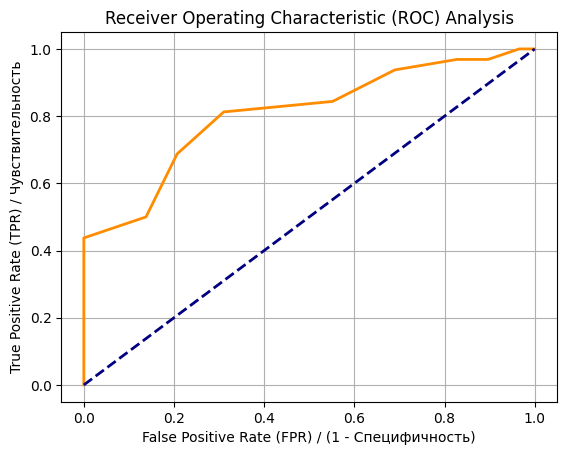

In [ ]:
import matplotlib.pyplot as plt

# построение ROC-кривой
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.4f})')

# построение линии случайного классификатора (диагональ)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
label='Случайный классификатор (AUC = 0.5)')

# настройка осей и заголовка
plt.xlabel('False Positive Rate (FPR) / (1 - Специфичность)')
plt.ylabel('True Positive Rate (TPR) / Чувствительность')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.grid(True)
plt.show()